## Is it a bird?

## Step 1: Download images of birds and non-birds

In [1]:
!pip install -U duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.6 MB/s eta 0:00:00


In [2]:
import duckduckgo_search as ddg # Make sure the function name is correctly spelled and capitalized
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg.DDGS().images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

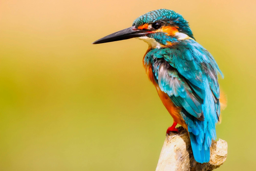

In [4]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

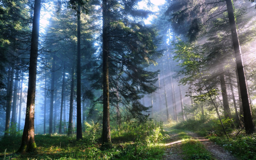

In [5]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [6]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

## Step 2: Train our model

In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

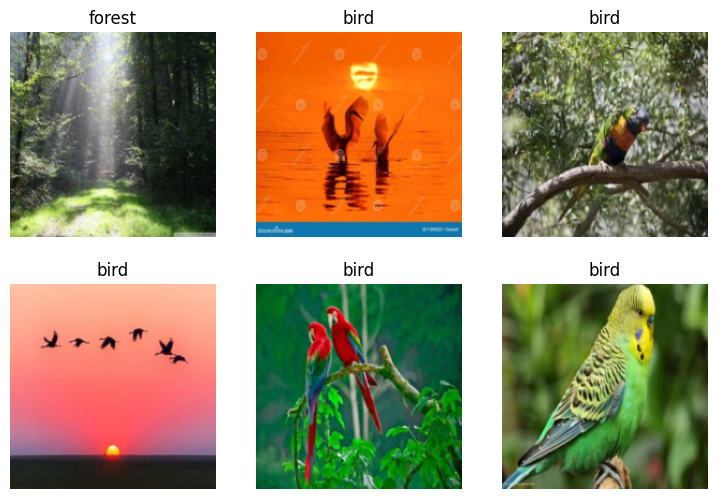

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.680583,0.134720,0.042781,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.115452,0.113951,0.042781,00:05
1,0.067122,0.062886,0.016043,00:03
2,0.042657,0.061312,0.021390,00:03


## Step 3: Use our model (and build your own!)

In [14]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


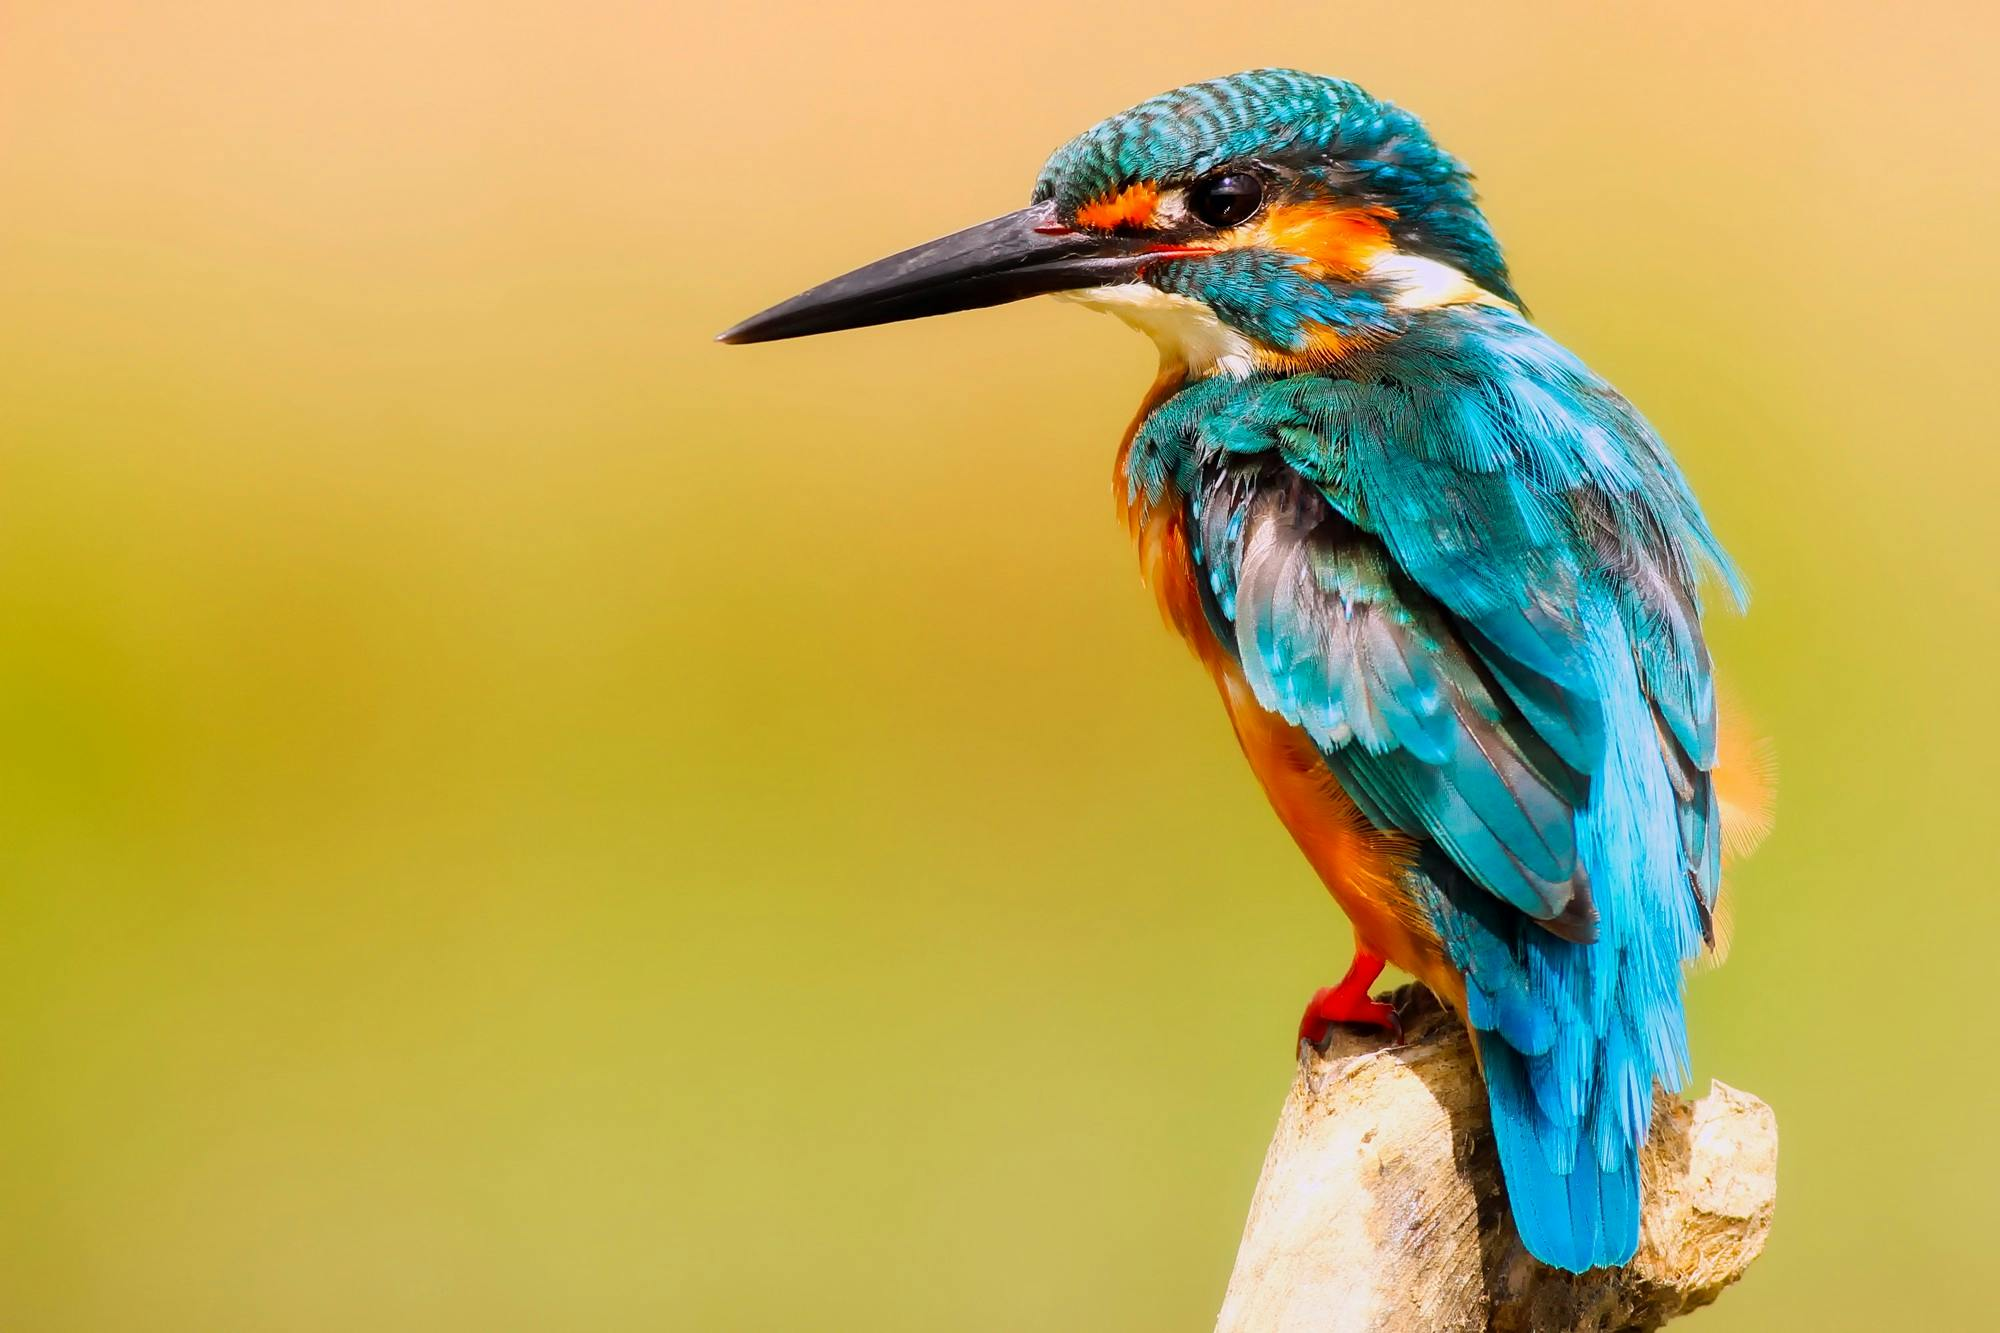

In [17]:
PILImage.create('bird.jpg')

# try cat dog classification

In [18]:
searches = 'cat','dog'
path = Path('cat_dog')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

11

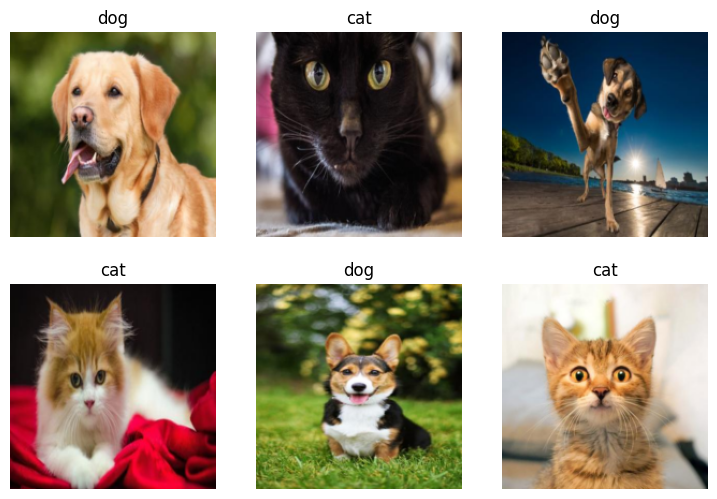

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.308952,0.337603,0.086957,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.481900,0.140629,0.021739,00:01
1,0.322801,0.090550,0.021739,00:01
2,0.235972,0.080574,0.021739,00:01


In [23]:
# prompt: downlaod image of dog

download_url(search_images('dog photos', max_images=1)[0], 'dog.jpg', show_progress=False)


Path('dog.jpg')

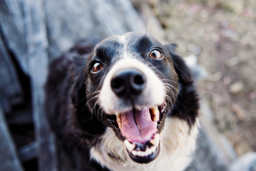

In [40]:
Image.open('dog.jpg').to_thumb(256,256)

In [39]:
obj,_,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a: {obj}.")
print(f"Probability it's a cat or dog: {probs}")

This is a: dog.
Probability it's a cat or dog: tensor([4.1167e-06, 1.0000e+00])
